# Investigating arrtists
This code will look into
- What artists have the most total streams and how many songs do they have
- What artists have the biggest amount of daily streams and which ones are one hit wonders
- What are some of the average amounts of total streams for artists

In [30]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

In [26]:
# Load in our data
streaming_df = pd.read_csv('/Users/joseflemker/Documents/GitHub/3250-data-analytics-template/data/finished/merged_data_finished.csv', encoding='utf-8')

In [27]:
# Filter for artists with the most amount of total streams
most_streams = streaming_df.groupby('artist_name').agg(
    total_streams_sum = ('total_streams', 'sum'),
    song_count=('track_name', 'count')
).reset_index()

#Print the top 10
print(most_streams.sort_values(by='total_streams_sum', ascending=False).head(10))


         artist_name  total_streams_sum  song_count
230       The Weeknd       2.100950e+10          10
66        Ed Sheeran       1.343357e+10           7
241     XXXTENTACION       1.139211e+10           6
90      Harry Styles       9.384717e+09           5
69            Eminem       9.054852e+09           5
117    Justin Bieber       8.568378e+09           7
139      Linkin Park       8.080838e+09           7
173   Olivia Rodrigo       8.063655e+09           5
96   Imagine Dragons       7.638848e+09           5
61             Drake       7.440048e+09           3


In [28]:
# Filter for artists with the most amount of max daily streams
most_daily_streams = streaming_df.groupby('artist_name').agg(
    max_daily_steams = ('daily_streams', 'max'),
    song_count=('track_name', 'count')
).reset_index()

#Print the top 10
print(most_daily_streams.sort_values(by='max_daily_steams', ascending=False).head(10))

              artist_name  max_daily_steams  song_count
141            Lord Huron         3162572.0           1
15         Arctic Monkeys         2885563.0           2
228     The Neighbourhood         2882322.0           5
36             Bruno Mars         2854454.0           3
174         One Direction         2728422.0           2
48               Coldplay         2635718.0           2
139           Linkin Park         2289070.0           7
239             Vance Joy         2278425.0           2
234             Tom Odell         1983132.0           1
46   Cigarettes After Sex         1968385.0           2


In [29]:
# Filter for artists with the most amount of average total streams
most_avg_total_streams = streaming_df.groupby('artist_name').agg(
    average_total_streams = ('total_streams', 'mean'),
    song_count=('track_name', 'count')
).reset_index()

# Filter for artists with 5 or more songs
most_avg_total_streams = most_avg_total_streams[most_avg_total_streams['song_count'] >= 5]

#Print the top 10
print(most_avg_total_streams.sort_values(by='average_total_streams', ascending=False).head(10))

           artist_name  average_total_streams  song_count
230         The Weeknd           2.100950e+09          10
66          Ed Sheeran           1.919081e+09           7
241       XXXTENTACION           1.898686e+09           6
90        Harry Styles           1.876943e+09           5
69              Eminem           1.810970e+09           5
173     Olivia Rodrigo           1.612731e+09           5
96     Imagine Dragons           1.527770e+09           5
228  The Neighbourhood           1.487321e+09           5
175        OneRepublic           1.292441e+09           5
117      Justin Bieber           1.224054e+09           7


/var/folders/cn/ktnh7mkx07l6n4lyfl088tth0000gn/T/ipykernel_1065/3015908030.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekend_x, y=weekend_y, palette='coolwarm')


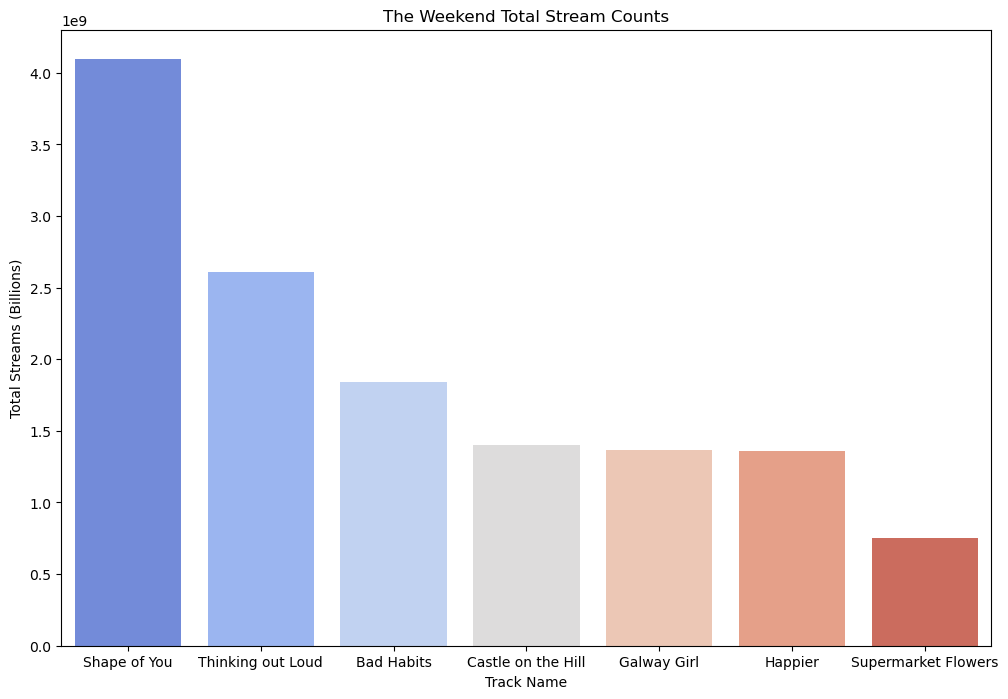

In [59]:
# Visualize song streams for the weekend
the_weekend_songs = streaming_df[streaming_df['artist_name'] == 'Ed Sheeran']

weekend_x = the_weekend_songs['track_name']
weekend_y = the_weekend_songs['total_streams']

plt.figure(figsize=(12,8))
sns.barplot(x=weekend_x, y=weekend_y, palette='coolwarm')
plt.title("The Weekend Total Stream Counts")
plt.xlabel("Track Name")
plt.ylabel("Total Streams (Billions)")

plt.show()

In [51]:
# Looking at song characteristics of top artists vs bottom artists
# Filter for artists with the most amount of total streams
most_streamsAndFeatures = streaming_df.groupby('artist_name').agg(
    total_streams_avg = ('total_streams', 'mean'),
    danceability_avg=('danceability', 'mean'),
    energy_avg=('energy', 'mean'),
    liveness_avg=('liveness', 'mean'),
    valence_avg=('valence', 'mean'),
    speechiness_avg=('speechiness', 'mean'),
    acousticness_avg=('acousticness', 'mean')
).reset_index()

# Save the top and bottom 10 by average streams
top_artists_features = most_streamsAndFeatures.sort_values(by='total_streams_avg', ascending=False).head(10)
bottom_artists_features = most_streamsAndFeatures.sort_values(by='total_streams_avg', ascending=False).tail(10)

In [52]:
# Add a 'Category' column
top_artists_features['Category'] = 'Top 10 Artists'
bottom_artists_features['Category'] = 'Bottom 10 Artists'

# Combine the two DataFrames
comparison_df = pd.concat([top_artists_features, bottom_artists_features])


In [53]:
# Melt the DataFrame into long format
melted_df = comparison_df.melt(
    id_vars=['artist_name', 'Category', 'total_streams_avg'],
    value_vars=[
        'danceability_avg', 'energy_avg', 'liveness_avg', 
        'valence_avg', 'speechiness_avg', 'acousticness_avg'
    ],
    var_name='Feature',
    value_name='Average Value'
)


/var/folders/cn/ktnh7mkx07l6n4lyfl088tth0000gn/T/ipykernel_1065/1036400166.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


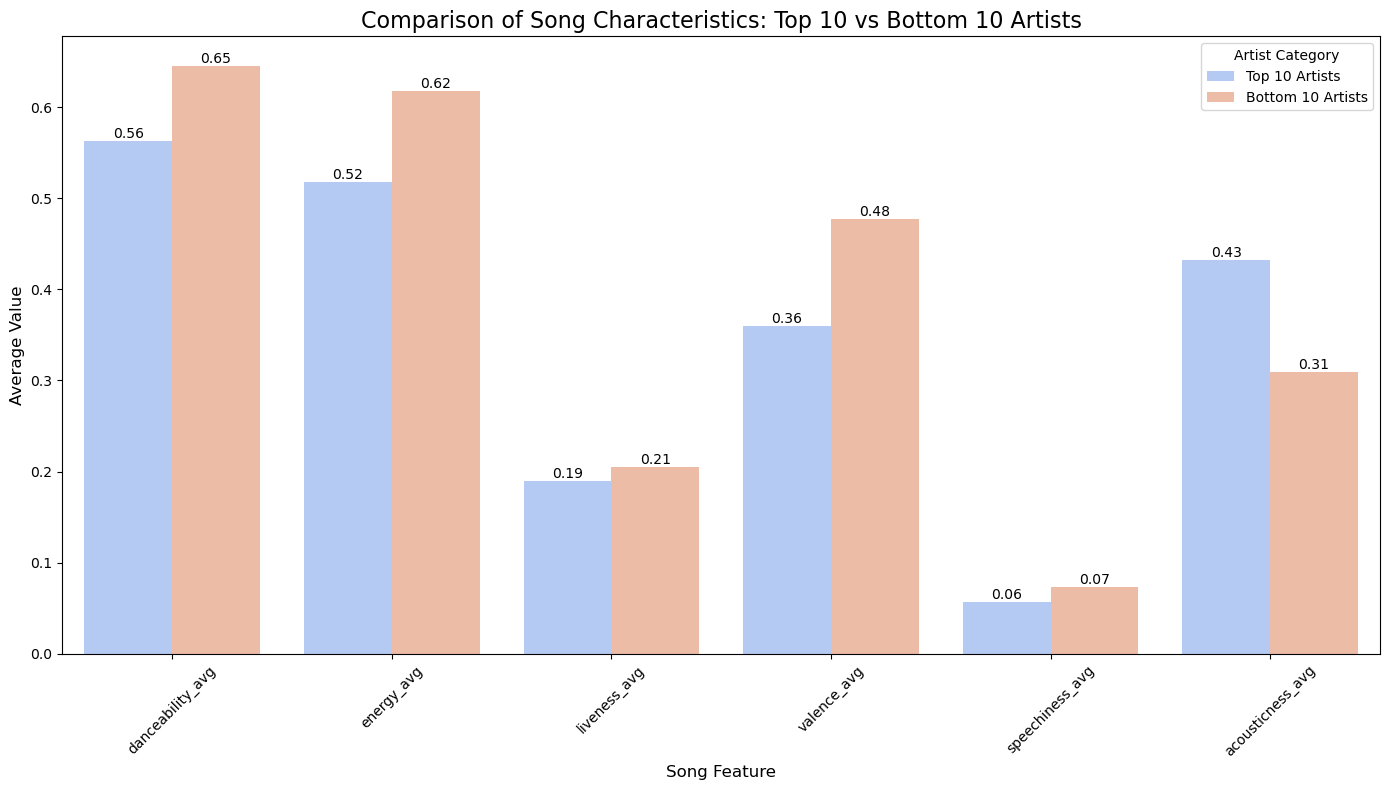

In [63]:
plt.figure(figsize=(14, 8))

# Create a barplot without error bars
ax = sns.barplot(
    data=melted_df,
    x='Feature',
    y='Average Value',
    hue='Category',
    palette='coolwarm',
    ci=None  # Disable error bars
)

# Add data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type='edge', fontsize=10)

# Customize the plot
plt.title('Comparison of Song Characteristics: Top 10 vs Bottom 10 Artists', fontsize=16)
plt.xlabel('Song Feature', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Artist Category', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()



/var/folders/cn/ktnh7mkx07l6n4lyfl088tth0000gn/T/ipykernel_1065/3445213240.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/var/folders/cn/ktnh7mkx07l6n4lyfl088tth0000gn/T/ipykernel_1065/3445213240.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


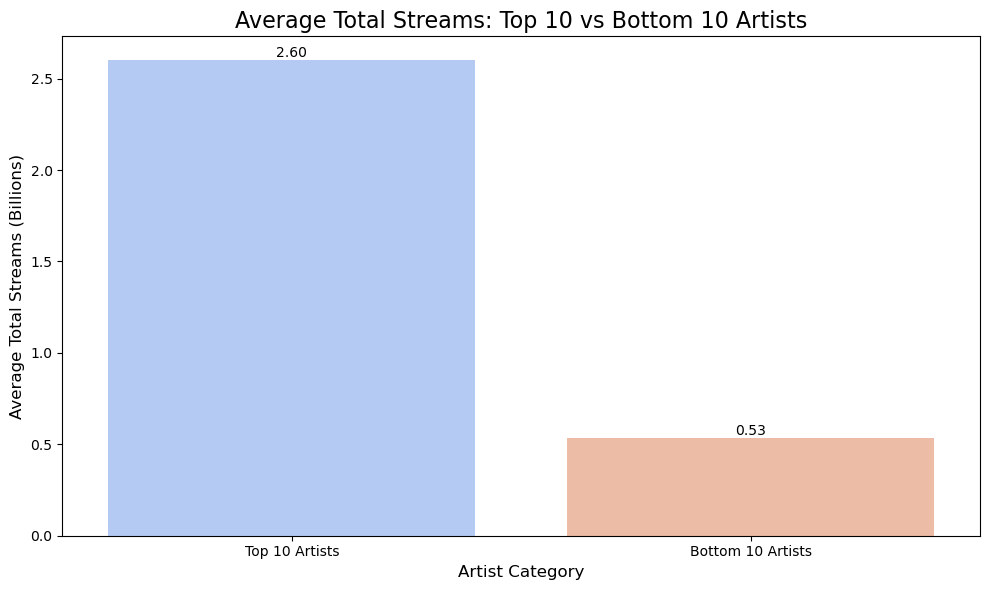

In [67]:
plt.figure(figsize=(10, 6))

# Create a barplot without error bars, and scale 'total_streams_avg' by a billion
comparison_df['scaled_streams'] = comparison_df['total_streams_avg'] / 1e9  # Scale by a billion

# Create a barplot using the scaled values
ax = sns.barplot(
    data=comparison_df,
    x='Category',
    y='scaled_streams',  # Use the scaled values for y-axis
    palette='coolwarm',
    ci=None  # Disable error bars
)

# Add data labels, formatted to 2 decimal places
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type='edge', fontsize=10)

# Remove scientific notation from axis labels
plt.ticklabel_format(style='plain', axis='y')

# Customize the plot
plt.title('Average Total Streams: Top 10 vs Bottom 10 Artists', fontsize=16)
plt.xlabel('Artist Category', fontsize=12)
plt.ylabel('Average Total Streams (Billions)', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

